In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BTC-USD.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
1,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
3,2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700
4,2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3.104000e+03
mean,14041.039379,14385.041532,13664.743745,14049.414854,14049.414854,1.715624e+10
std,16095.940891,16500.087552,15634.140273,16093.557426,16093.557426,1.962263e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,1.060090e+07
25%,1035.762481,1052.200043,1014.922485,1037.797515,1037.797515,2.255415e+08
50%,8051.509277,8227.814941,7841.081788,8050.035400,8050.035400,1.216461e+10
75%,20629.445801,21144.436035,20235.452637,20648.897949,20648.897949,2.825679e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [6]:
df['Percent Change'] = df['Close'].pct_change()*100

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Percent Change
0,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,NaN
1,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,-6.007853
2,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,3.890684
3,2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700,4.268162
4,2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800,2.847073


In [8]:
df = df.dropna(subset=['Percent Change'])

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Percent Change
1,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,-6.007853
2,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,3.890684
3,2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700,4.268162
4,2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800,2.847073
5,2015-01-08,294.135010,294.135010,282.174988,283.348999,283.348999,19982500,-3.733138


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.set_index('Date',inplace=True)

In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Percent Change
Date,,,,,,,
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,-6.007853
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,3.890684
2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700,4.268162
2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800,2.847073
2015-01-08,294.135010,294.135010,282.174988,283.348999,283.348999,19982500,-3.733138


# plotting high and low values across years

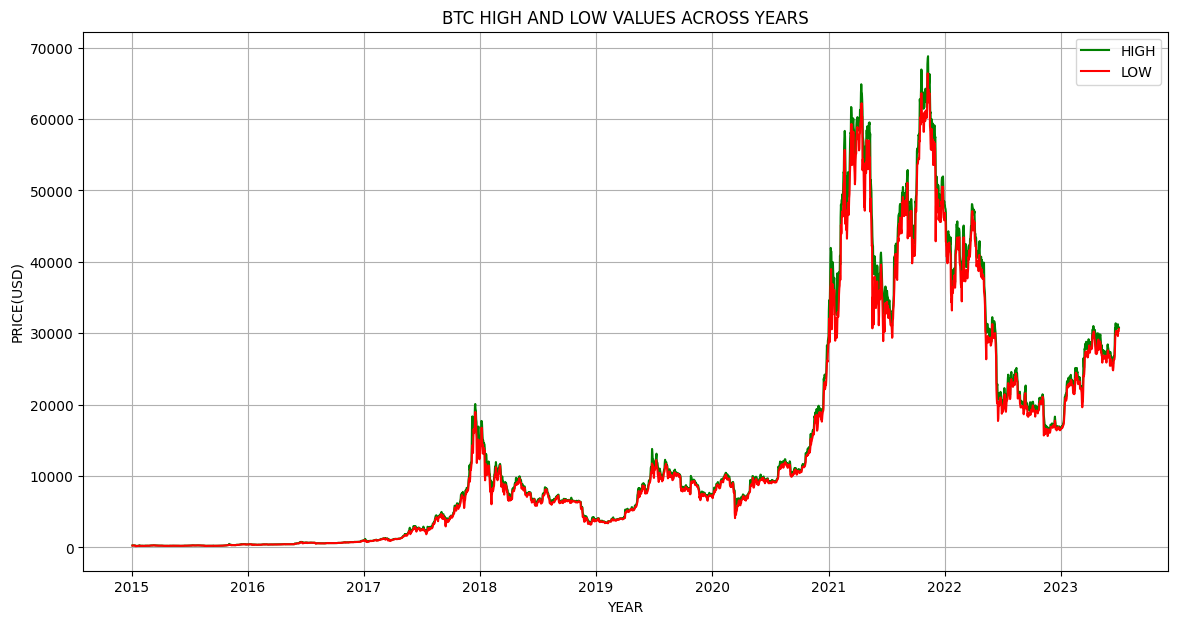

In [13]:
plt.figure(figsize=(14,7))
plt.plot(df['High'],label='HIGH',color='g')
plt.plot(df['Low'],label='LOW',color='r')
plt.title('BTC HIGH AND LOW VALUES ACROSS YEARS')
plt.xlabel("YEAR")
plt.ylabel("PRICE(USD)")
plt.legend()
plt.grid(True)

# analyzing trends based on days of week

In [14]:
df['Day Of Week'] = df.index.dayofweek

day_of_week_mapping = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['Day Of Week Name'] = df['Day Of Week'].map(day_of_week_mapping)

In [15]:
avg_percent_change_by_day = df.groupby('Day Of Week Name')['Percent Change'].mean()
avg_percent_change_by_day = avg_percent_change_by_day.loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

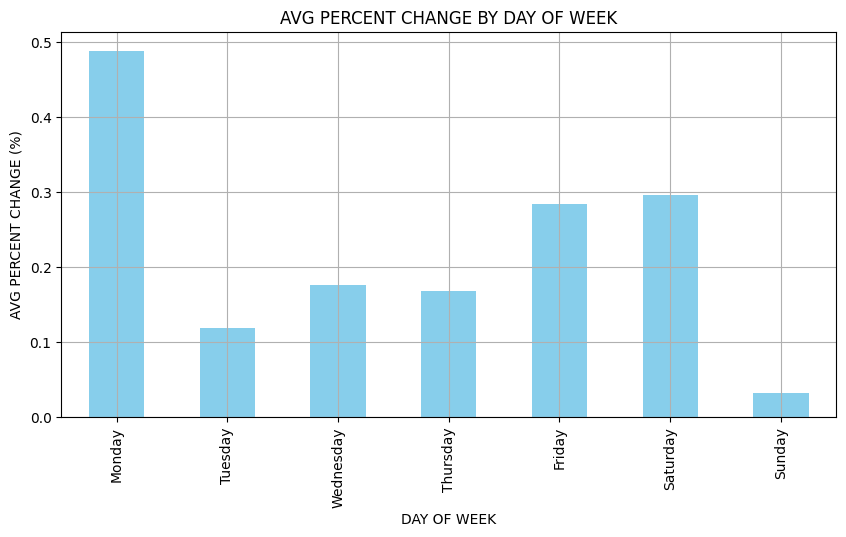

In [16]:
plt.figure(figsize=(10,5))
avg_percent_change_by_day.plot(kind='bar',color='skyblue')
plt.title("AVG PERCENT CHANGE BY DAY OF WEEK")
plt.xlabel("DAY OF WEEK")
plt.ylabel("AVG PERCENT CHANGE (%)")
plt.grid(True)

# analyzing uptrends and downtrends by day of week

In [17]:
uptrend_freq = df[df['Percent Change']>0].groupby('Day Of Week Name')['Percent Change'].count()
downtrend_freq = df[df['Percent Change']<0].groupby('Day Of Week Name')['Percent Change'].count()

In [18]:
uptrend_freq = uptrend_freq.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
downtrend_freq = downtrend_freq.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

# visualizing frequency of uptrends and downtrends by day of week

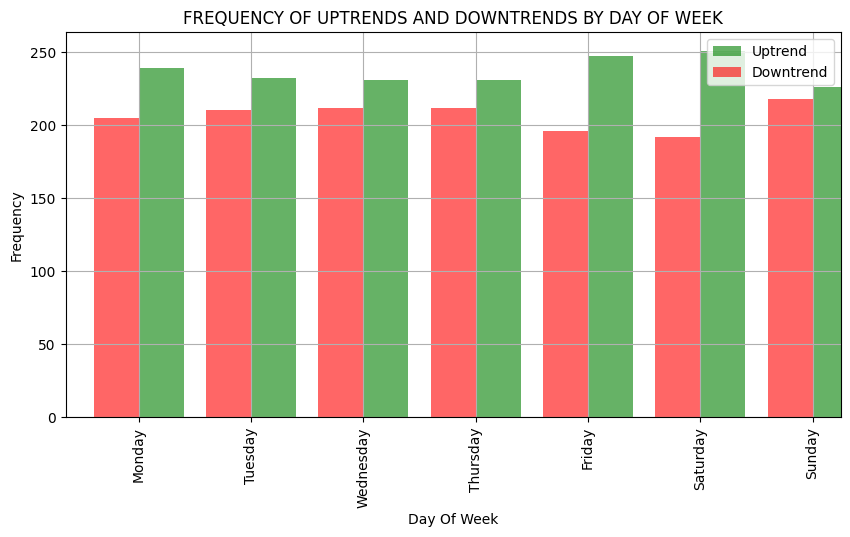

In [19]:
plt.figure(figsize=(10,5))
uptrend_freq.plot(kind='bar',color='g',alpha=0.6,position=0,width=0.4,label='Uptrend')
downtrend_freq.plot(kind='bar',color='r',alpha=0.6,position=1,width=0.4,label='Downtrend')
plt.title("FREQUENCY OF UPTRENDS AND DOWNTRENDS BY DAY OF WEEK")
plt.xlabel("Day Of Week")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

# identifying dramatic bullish trends

In [20]:
threshold = 10
bullish_days = df[df['Percent Change'] > threshold]
bullish_days

,Open,High,Low,Close,Adj Close,Volume,Percent Change,Day Of Week,Day Of Week Name
Date,,,,,,,,,
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,17.821709,3,Thursday
2015-11-02,325.941986,365.359985,323.209015,361.188995,361.188995,101918000,10.987888,0,Monday
2015-11-03,361.872986,417.899994,357.647003,403.416992,403.416992,206162000,11.691385,1,Tuesday
2016-01-20,379.739990,425.266998,376.598999,420.230011,420.230011,121720000,10.543504,2,Wednesday
2016-05-28,473.028992,533.473022,472.699005,530.039978,530.039978,181199008,11.949375,5,Saturday
2016-06-12,609.684021,684.843994,607.039001,672.783997,672.783997,277084992,10.887435,6,Sunday
2016-06-16,696.523010,773.721985,696.523010,766.307983,766.307983,271633984,10.344449,3,Thursday
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,10.623277,2,Wednesday
2017-07-17,1932.619995,2230.489990,1932.619995,2228.409912,2228.409912,1201760000,15.472426,0,Monday


# examine context for dramatic bullish days

In [21]:
for index,row in bullish_days.head(5).iterrows():
    print(f"Date : {index}")
    print(f"Percent Change : {row['Percent Change']:.2f}%")
    print(f"Close Price : {row['Close']}")
    print(f"High : {row['High']}")
    print(f"Low : {row['Low']}")
    print()

Date : 2015-01-15 00:00:00
Percent Change : 17.82%
Close Price : 209.843994
High : 229.067001
Low : 176.897003

Date : 2015-11-02 00:00:00
Percent Change : 10.99%
Close Price : 361.188995
High : 365.359985
Low : 323.209015

Date : 2015-11-03 00:00:00
Percent Change : 11.69%
Close Price : 403.416992
High : 417.899994
Low : 357.647003

Date : 2016-01-20 00:00:00
Percent Change : 10.54%
Close Price : 420.230011
High : 425.266998
Low : 376.598999

Date : 2016-05-28 00:00:00
Percent Change : 11.95%
Close Price : 530.039978
High : 533.473022
Low : 472.699005



In [22]:
print("Significant Bullish Days for Manual Reseach : ")
for date in bullish_days.index[:10]:
    print(date)

Significant Bullish Days for Manual Reseach : 
2015-01-15 00:00:00
2015-11-02 00:00:00
2015-11-03 00:00:00
2016-01-20 00:00:00
2016-05-28 00:00:00
2016-06-12 00:00:00
2016-06-16 00:00:00
2017-01-04 00:00:00
2017-07-17 00:00:00
2017-07-20 00:00:00


# TIME SERIES FORECASTING with ARIMA

In [23]:
df = df.sort_index()

In [24]:
ts_data = df['Close']

# splitting the data into training and testing sets

In [25]:
train_size = int(len(ts_data)*0.8)
train,test = ts_data[:train_size],ts_data[train_size:]

In [26]:
print(f"Training length : {len(train)}")
print(f"Test length : {len(test)}")

Training length : 2482
Test length : 621


In [27]:
model = ARIMA(train,order=(5,1,0))
model_fit = model.fit()

In [28]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2482
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -19859.579
Date:                Thu, 30 May 2024   AIC                          39731.157
Time:                        14:59:59   BIC                          39766.056
Sample:                    01-04-2015   HQIC                         39743.832
                         - 10-20-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0453      0.009     -4.905      0.000      -0.063      -0.027
ar.L2          0.0507      0.009      5.691      0.000       0.033       0.068
ar.L3          0.0260      0.009      2.779      0.0

In [29]:
forecast_results = model_fit.get_forecast(steps=len(test))

In [30]:
forecast = forecast_results.predicted_mean

In [31]:
stderr = forecast_results.se_mean

In [32]:
conf_int = forecast_results.conf_int()

In [33]:
print("Forecasted values:", forecast)
print("Standard errors:", stderr)
print("Confidence intervals:", conf_int)

Forecasted values: 2021-10-21    66066.517756
2021-10-22    66243.409583
2021-10-23    66410.974070
2021-10-24    66537.237042
2021-10-25    66571.543982
                  ...     
2023-06-29    66627.048488
2023-06-30    66627.048488
2023-07-01    66627.048488
2023-07-02    66627.048488
2023-07-03    66627.048488
Freq: D, Name: predicted_mean, Length: 621, dtype: float64
Standard errors: 2021-10-21      725.406366
2021-10-22     1002.912773
2021-10-23     1240.950970
2021-10-24     1448.080519
2021-10-25     1647.551781
                  ...     
2023-06-29    19976.018183
2023-06-30    19992.222743
2023-07-01    20008.414180
2023-07-02    20024.592524
2023-07-03    20040.757809
Freq: D, Name: var_pred_mean, Length: 621, dtype: float64
Confidence intervals:              lower Close    upper Close
2021-10-21  64644.747405   67488.288107
2021-10-22  64277.736668   68209.082499
2021-10-23  63978.754863   68843.193278
2021-10-24  63699.051377   69375.422706
2021-10-25  63342.401828   6980

In [34]:
forecast_series = pd.Series(forecast,index=test.index)
forecast_series

Date
2021-10-21    66066.517756
2021-10-22    66243.409583
2021-10-23    66410.974070
2021-10-24    66537.237042
2021-10-25    66571.543982
                  ...     
2023-06-29    66627.048488
2023-06-30    66627.048488
2023-07-01    66627.048488
2023-07-02    66627.048488
2023-07-03    66627.048488
Name: predicted_mean, Length: 621, dtype: float64

In [35]:
lower_bounds = conf_int.iloc[:, 0]
upper_bounds = conf_int.iloc[:, 1]

# plotting actual vs forecasted values

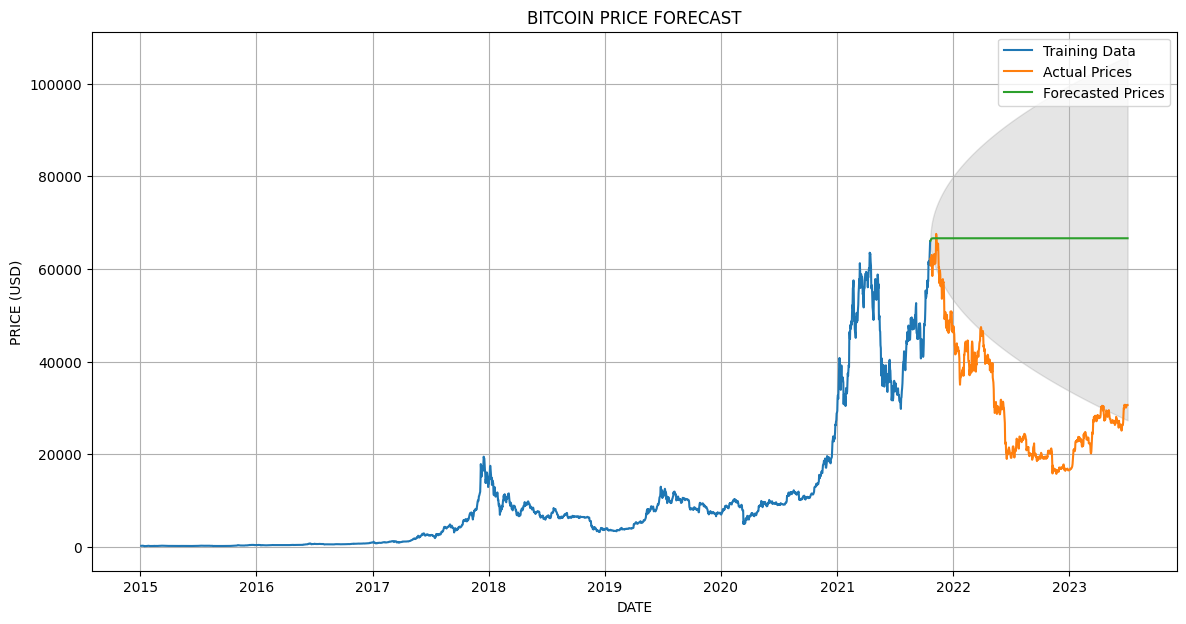

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Prices')
plt.plot(forecast_series, label='Forecasted Prices')
plt.fill_between(forecast_series.index, lower_bounds, upper_bounds, color='k', alpha=0.1)
plt.title('BITCOIN PRICE FORECAST')
plt.xlabel('DATE')
plt.ylabel('PRICE (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# fitting the ARIMA model on entire dataset to forecast future prices
model_full = ARIMA(ts_data,order=(5,1,0))
model_full_fit = model_full.fit()

In [38]:
forecast_results_full = model_full_fit.forecast(steps=365)

forecast_full = forecast_results_full
stderr_full = None  

mean_forecast = forecast_results_full.mean()
std_forecast = forecast_results_full.std()
z_score = 1.96  # for 95% confidence interval (assuming normal distribution)
lower_bound = mean_forecast - (z_score * std_forecast)
upper_bound = mean_forecast + (z_score * std_forecast)
conf_int_full = pd.DataFrame({'lower': lower_bound, 'upper': upper_bound}, index=forecast_results_full.index)

In [39]:
print("Forecasted values:", forecast_full)
print("Standard errors:", stderr_full)
print("Confidence intervals:", conf_int_full)

Forecasted values: 2023-07-04    30660.231708
2023-07-05    30664.959588
2023-07-06    30668.127064
2023-07-07    30669.684986
2023-07-08    30670.467735
                  ...     
2024-06-28    30671.198238
2024-06-29    30671.198238
2024-06-30    30671.198238
2024-07-01    30671.198238
2024-07-02    30671.198238
Freq: D, Name: predicted_mean, Length: 365, dtype: float64
Standard errors: None
Confidence intervals:                    lower         upper
2023-07-04  30669.794097  30672.474397
2023-07-05  30669.794097  30672.474397
2023-07-06  30669.794097  30672.474397
2023-07-07  30669.794097  30672.474397
2023-07-08  30669.794097  30672.474397
...                  ...           ...
2024-06-28  30669.794097  30672.474397
2024-06-29  30669.794097  30672.474397
2024-06-30  30669.794097  30672.474397
2024-07-01  30669.794097  30672.474397
2024-07-02  30669.794097  30672.474397

[365 rows x 2 columns]


In [40]:
forecast_full_series = pd.Series(forecast_full,index=pd.date_range(start=ts_data.index[-1]+pd.Timedelta(days=1),periods=365))
forecast_full_series

2023-07-04    30660.231708
2023-07-05    30664.959588
2023-07-06    30668.127064
2023-07-07    30669.684986
2023-07-08    30670.467735
                  ...     
2024-06-28    30671.198238
2024-06-29    30671.198238
2024-06-30    30671.198238
2024-07-01    30671.198238
2024-07-02    30671.198238
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

# plotting the actual data and forecast

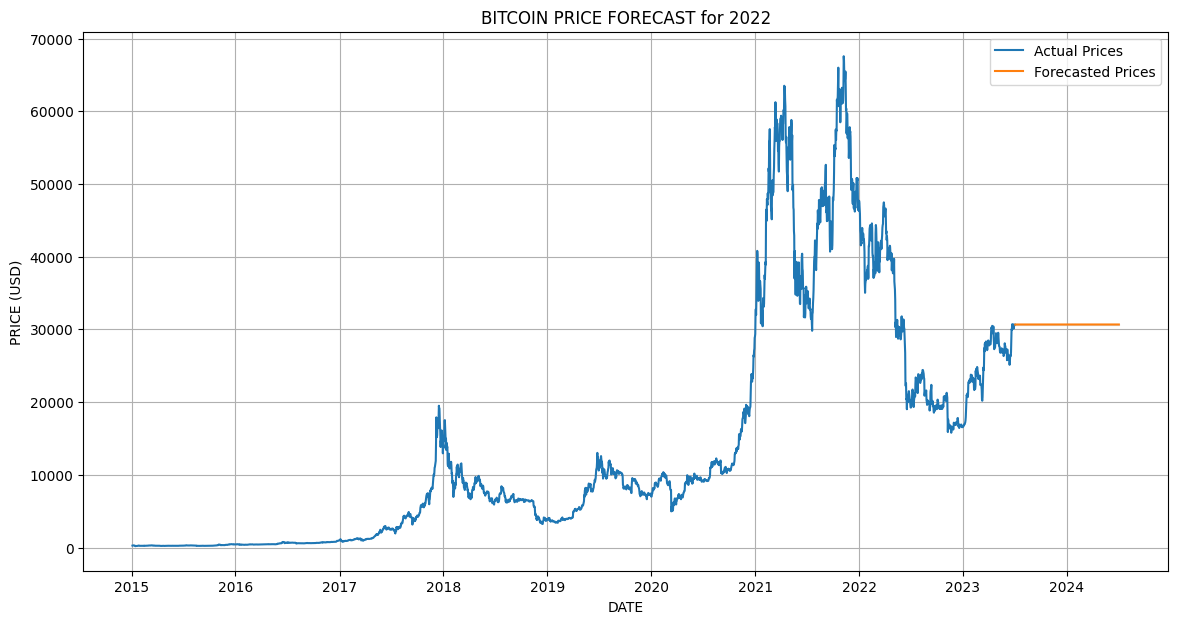

In [41]:
plt.figure(figsize=(14, 7))
plt.plot(ts_data, label='Actual Prices')
plt.plot(forecast_full.index, forecast_full.values, label='Forecasted Prices')

plt.fill_between(forecast_full_series.index, conf_int_full['lower'], conf_int_full['upper'], color='k', alpha=0.1)

plt.title('BITCOIN PRICE FORECAST for 2022')
plt.xlabel('DATE')
plt.ylabel('PRICE (USD)')
plt.legend()
plt.grid(True)
plt.show()

# training a random forest classifier

In [42]:
df['Target'] = (df['Percent Change'] > 0).astype(int)
features = ['Open','High','Low','Close','Volume']
X = df[features]
Y = df['Target']

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [44]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(2482, 5) (621, 5) (2482,) (621,)


In [45]:
rfc = RandomForestClassifier(n_estimators=100,random_state=42)

In [46]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [47]:
Y_pred = rfc.predict(X_test)
Y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [48]:
print('Classification Report : \n',classification_report(Y_test,Y_pred))
print('Accuracy Score : ',accuracy_score(Y_test,Y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.72      0.74       283
           1       0.78      0.81      0.79       338

    accuracy                           0.77       621
   macro avg       0.77      0.77      0.77       621
weighted avg       0.77      0.77      0.77       621

Accuracy Score :  0.7713365539452496


In [49]:
df['Signal'] = rfc.predict(X)

In [50]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Percent Change',
       'Day Of Week', 'Day Of Week Name', 'Target', 'Signal'],
      dtype='object')

In [51]:
df[['Open', 'High', 'Low', 'Close', 'Volume', 'Percent Change','Target', 'Signal']].head()

,Open,High,Low,Close,Volume,Percent Change,Target,Signal
Date,,,,,,,,
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,-6.007853,0,0
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,3.890684,1,1
2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700,4.268162,1,1
2015-01-07,286.076996,298.753998,283.079010,294.337006,24866800,2.847073,1,1
2015-01-08,294.135010,294.135010,282.174988,283.348999,19982500,-3.733138,0,0


# plotting the closing price with buy/sell signals

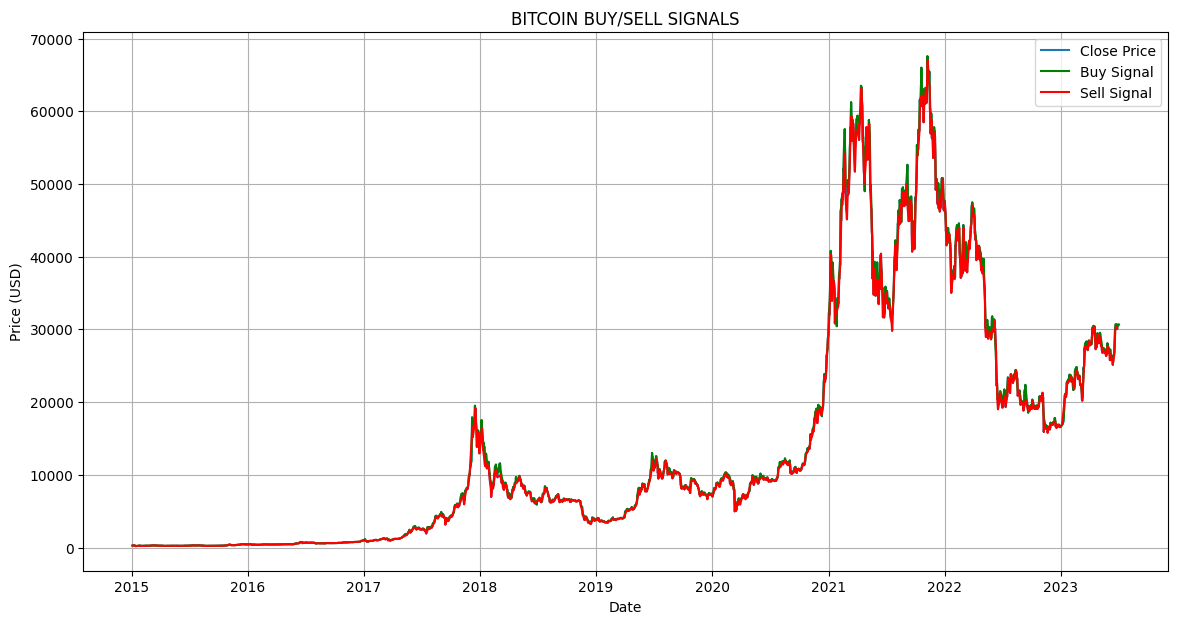

In [52]:
plt.figure(figsize=(14,7))
plt.plot(df['Close'],label='Close Price')
plt.plot(df[df['Signal']==1].index,df[df['Signal']==1]['Close'],markersize=10,color='g',label='Buy Signal')
plt.plot(df[df['Signal']==0].index,df[df['Signal']==0]['Close'],markersize=10,color='r',label='Sell Signal')
plt.title('BITCOIN BUY/SELL SIGNALS')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

In [54]:
import pickle
with open('bitcoin.pkl', 'wb') as file:
    pickle.dump(rfc, file)

In [55]:
with open('df.pkl', 'wb') as file:
    pickle.dump(df, file)